# TP2 Statistiques

## Exercice 1

Import des packages

In [1]:
import math
import numpy as np
from sklearn import linear_model
from os import mkdir
import timeit as tm
import random
from os import path
import pandas as pd
import urllib
import zipfile
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.neighbors import KernelDensity
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression
import io
import requests
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import sys

# Question 1

In [5]:
data = pd.read_csv('http://josephsalmon.eu/enseignement/TELECOM/MDI720/datasets/Galton.txt', header = 0, sep = '\t', names=['FAMILY','FATHER','MOTHER','GENDER','HEIGHT','KIDS'])
#data.HEIGHT.apply(np.round)
tailles = ['FATHER','MOTHER', 'HEIGHT']
data[tailles] = data[tailles].astype(float)
data[tailles] = data[tailles]*2.54
data[tailles] = data[tailles].round()
data[tailles] = data[tailles].astype(int)
data.head()

,FAMILY,FATHER,MOTHER,GENDER,HEIGHT,KIDS
0,1,199,170,M,186,4
1,1,199,170,F,176,4
2,1,199,170,F,175,4
3,1,199,170,F,175,4
4,2,192,169,M,187,4


# Question 2

In [10]:
dfWithoutNa.shape

(898, 6)

In [6]:
# Nombre de valeurs manquantes
nulltable = data.isnull().any(1) 
nullnumber = nulltable.sum() 

#Supprime toutes les lignes où il manque des données
dfWithoutNa = data.dropna(how='any') 
print("Il y a " + str(nullnumber) + " valeur manquante")

Il y a 0 valeur manquante


# Question 3

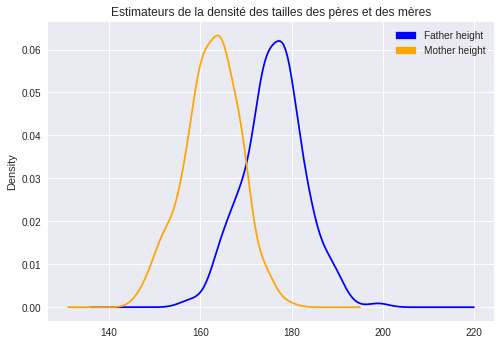

In [12]:
# Enlève les redondances des parents
df = data.drop_duplicates(subset=['FAMILY'], keep="last")

fig = plt.figure()
df.FATHER.plot.kde(color="blue")
df.MOTHER.plot.kde(color="orange")
father_patch = mpatches.Patch(color='blue', label='Father height')
mother_patch = mpatches.Patch(color='orange', label='Mother height')
plt.legend(handles=[father_patch,mother_patch])
plt.title("Estimateurs de la densité des tailles des pères et des mères")
plt.show()

# Question 4

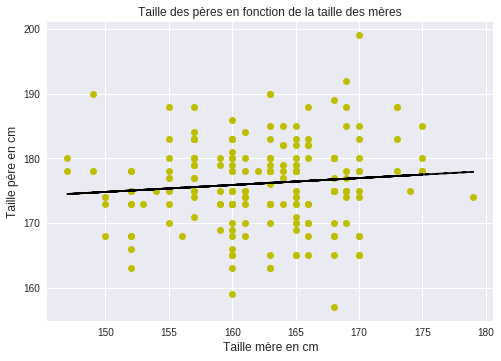

In [13]:
# Plot taille père en fonction taille mère
fig4 = plt.figure()
x = df['MOTHER']
y = df['FATHER']
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
#plt.scatter(x,y)
plt.plot(x,y, 'yo', x, fit_fn(x), '--k')
plt.xlabel('Taille mère en cm', fontsize=12)
plt.ylabel('Taille père en cm', fontsize=12)
plt.title("Taille des pères en fonction de la taille des mères")
plt.show()

# Question 5

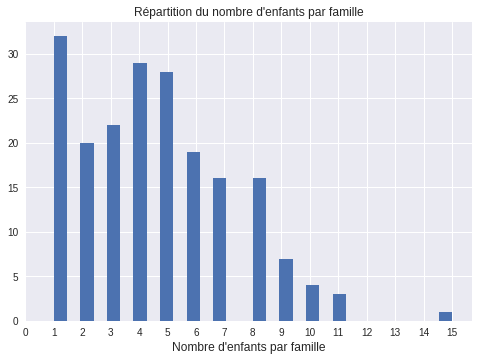

In [14]:
# Histogramme des enfants
figure5 = plt.figure()
df.hist(column='KIDS', bins=30)
plt.xticks(range(16))
plt.xlabel("Nombre d'enfants par famille", fontsize=12)
plt.title("Répartition du nombre d'enfants par famille")
plt.show()

# QUESTION 6

In [15]:
#Creation d'une nouvelle colonne qui donne une valeur à chaque enfant d'une moyenne des tailles de leur parents
data['MidParents'] = (data.FATHER + 1.08*data.MOTHER)/2.
df['MidParents'] = (df.FATHER + 1.08*df.MOTHER)/2.
data.head()

/home/antoine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,FAMILY,FATHER,MOTHER,GENDER,HEIGHT,KIDS,MidParents
0,1,199,170,M,186,4,191.30
1,1,199,170,F,176,4,191.30
2,1,199,170,F,175,4,191.30
3,1,199,170,F,175,4,191.30
4,2,192,169,M,187,4,187.26


# Question 7

Estimation de θ0 , θ1 , par θˆ0 , θˆ1 en utilisant la fonction LinearRegression de sklearn

In [16]:
X = data['MidParents'].values.reshape(len(data['MidParents']),1)
lm = LinearRegression()
lm.fit(X,data.HEIGHT)
meanmidparents=data['MidParents'].mean()
meanheight=data['HEIGHT'].mean()
teta1=((data['MidParents']-meanmidparents)*(data['HEIGHT']-meanheight)).sum()/((data['MidParents']-meanmidparents)**2).sum()
teta0=meanheight-teta1*meanmidparents
print("\nL'estimation de θ0 est : " + str(lm.intercept_) + "\nL'estimation de θ1 est : "+str(lm.coef_[0])+"\n")

print("Avons-nous égalité entre l'estimation de teta0 et son calcul numérique? " + str(np.isclose(teta0, lm.intercept_, atol=0.001)))
print("Avons-nous égalité entre l'estimation de teta1 et son calcul numérique? " + str(np.isclose(teta1, lm.coef_[0], atol=0.001)))


L'estimation de θ0 est : 58.255916588
L'estimation de θ1 est : 0.633093766663

Avons-nous égalité entre l'estimation de teta0 et son calcul numérique? True
Avons-nous égalité entre l'estimation de teta1 et son calcul numérique? True


# Question 8

In [17]:
data['EstimatedHeight']=teta0+teta1*data['MidParents']
girls = data.loc[data['GENDER'] == 'F']
boys = data.loc[data['GENDER'] == 'M']
data.head()

,FAMILY,FATHER,MOTHER,GENDER,HEIGHT,KIDS,MidParents,EstimatedHeight
0,1,199,170,M,186,4,191.30,179.366754
1,1,199,170,F,176,4,191.30,179.366754
2,1,199,170,F,175,4,191.30,179.366754
3,1,199,170,F,175,4,191.30,179.366754
4,2,192,169,M,187,4,187.26,176.809055


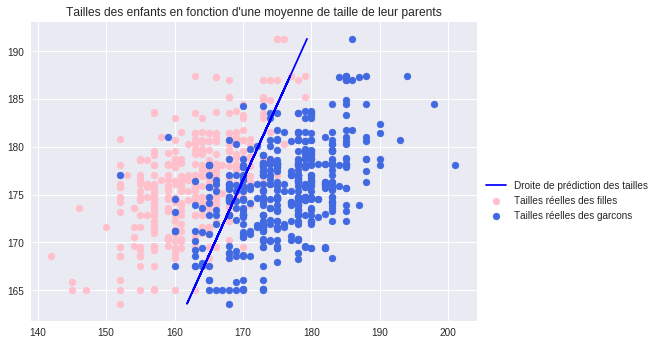

In [18]:
fig5=plt.figure()
plt.scatter(girls['HEIGHT'],girls['MidParents'],color='pink', label="Tailles réelles des filles")
plt.scatter(boys['HEIGHT'],boys['MidParents'],color='royalblue', label="Tailles réelles des garcons")

plt.plot(data['EstimatedHeight'],data['MidParents'],color='b',label="Droite de prédiction des tailles")
plt.title("Tailles des enfants en fonction d'une moyenne de taille de leur parents")
plt.legend(bbox_to_anchor = (1, 0.5))
plt.show()

# Question 9

Calculs des résidus : R = EstimatedHeight - Height

L'hypothèse que la densité des résidus suit une loi normale me parait crédible car c'est l'addition de deux lois normales indépendantes.

In [19]:
data['RESIDUS'] = data['HEIGHT'] - data['EstimatedHeight']
data.head()

,FAMILY,FATHER,MOTHER,GENDER,HEIGHT,KIDS,MidParents,EstimatedHeight,RESIDUS
0,1,199,170,M,186,4,191.30,179.366754,6.633246
1,1,199,170,F,176,4,191.30,179.366754,-3.366754
2,1,199,170,F,175,4,191.30,179.366754,-4.366754
3,1,199,170,F,175,4,191.30,179.366754,-4.366754
4,2,192,169,M,187,4,187.26,176.809055,10.190945


In [20]:
boys = data.loc[data['GENDER'] == 'M']
girls = data.loc[data['GENDER'] == 'F']
alphab = len(boys.HEIGHT)/len(data.HEIGHT)
alphag = len(girls.HEIGHT)/len(data.HEIGHT)
print("Il y a " +str(round(alphab*100,2))+"% de garcons et "+str(round(alphag*100,2))+"% de filles dans l'échantillon")

Il y a 51.78% de garcons et 48.22% de filles dans l'échantillon


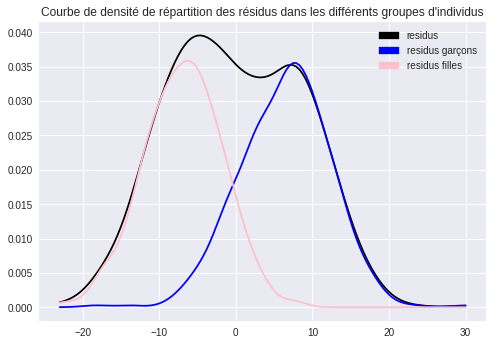

In [21]:
from scipy.stats import gaussian_kde
figure9 = plt.figure()
density = gaussian_kde(data.RESIDUS)
densityb = gaussian_kde(boys.RESIDUS)
densityg = gaussian_kde(girls.RESIDUS)
xs = np.r_[data.RESIDUS.min():data.RESIDUS.max():128j]
residus_patch = mpatches.Patch(color='black', label='residus')
boys_patch = mpatches.Patch(color='blue', label='residus garçons')
girls_patch = mpatches.Patch(color='pink', label='residus filles')
plt.plot(xs,density(xs),color = 'black')
plt.plot(xs,alphab*densityb(xs),color = 'blue')
plt.plot(xs,alphag*densityg(xs),color='pink')
plt.legend(handles=[residus_patch,boys_patch,girls_patch])
plt.title("Courbe de densité de répartition des résidus dans les différents groupes d'individus")
plt.show()

# Question 10

In [22]:
Y = data['HEIGHT'].values.reshape(len(data['HEIGHT']),1)
lm = LinearRegression()
lm.fit(Y,data.MidParents)
meanmidparents=data['MidParents'].mean()
meanheight=data['HEIGHT'].mean()
varparents = np.var(data['MidParents'])
varheight = np.var(data['HEIGHT'])

alpha0 = meanmidparents + meanheight*varparents*(teta0 - meanheight)/(meanmidparents*varheight)
alpha1 = teta1*varparents/varheight

np.isclose(alpha0, lm.intercept_, atol=0.001)
print("\nL'estimation de α0 est : " + str(lm.intercept_) + "\nL'estimation de α1 est : "+str(lm.coef_[0])+"\n")

print("Avons-nous égalité entre l'estimation de α0 et son calcul numérique? " + str(np.isclose(alpha0, lm.intercept_, atol=0.001)))
print("Avons-nous égalité entre l'estimation de α1 et son calcul numérique? " + str(np.isclose(alpha1, lm.coef_[0], atol=0.001)))


L'estimation de α0 est : 148.437160448
L'estimation de α1 est : 0.161490302931

Avons-nous égalité entre l'estimation de α0 et son calcul numérique? True
Avons-nous égalité entre l'estimation de α1 et son calcul numérique? True


## Exercice 2

# Question 11

In [23]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original"
fields = ['mpg','cylinders','displacement','horse power','weight','acceleration','model year','origin', 'car name']
car=pd.read_csv(url, sep = '\s+', names = fields)
myData = car.copy()
del car['origin']
del car['car name']
myData.head()

,mpg,cylinders,displacement,horse power,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


D'après le fichier descriptif les données manquantes sont notées "NA":

In [25]:
print("Il y a " + str(car.isnull().sum().sum()) + " valeurs manquantes")

Il y a 14 valeurs manquantes


On supprime les données manquantes:

In [26]:
car = car.dropna(how='any') 
print("Il y a " + str(car.isnull().sum().sum()) + " valeurs manquantes")

Il y a 0 valeurs manquantes


# Question 12

In [27]:
donnees = car[0:9]
X = donnees[['cylinders','displacement','horse power','weight','acceleration','model year']].values.reshape(len(donnees['cylinders']),6)
lm = LinearRegression()
lm.fit(X,donnees.mpg)
print("\nL'estimation de θ0 est : " + str(lm.intercept_) + "\nL'estimation de θ1 est : ")
for i in range(6):
    print("                     Pour "+fields[i+1]+": "+str(lm.coef_[i]))


L'estimation de θ0 est : 30.7716953656
L'estimation de θ1 est : 
                     Pour cylinders: 0.0
                     Pour displacement: 0.0540884756683
                     Pour horse power: -0.094530596162
                     Pour weight: -0.00424073670631
                     Pour acceleration: -0.199367012686
                     Pour model year: 0.0


On remarque que les coefficients des variables Cylinders et Model Year sont nuls. En effet, dans les 9 premieres lignes de notre dataframe, les valeurs de cylinders et model year sont similaires et ne sont donc pas responsables de la différence de consommation des véhicules.

In [29]:
beta0 = lm.intercept_
beta1 = lm.coef_
def multiplylist(beta0,df,l1,l2):
    p=beta0
    for i in range(len(l2)):
        p = p + df[l1[i]]*l2[i]
        #p = p + df.loc[df[l1[i]]]*l2[i]
    return p
donnees['Estimatedmpg']=multiplylist(beta0,donnees,fields[1:7],beta1)
donnees

/home/antoine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,mpg,cylinders,displacement,horse power,weight,acceleration,model year,Estimatedmpg
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,17.835934
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,16.151352
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,17.028033
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,16.084149
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,17.152477
5,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,14.855885
6,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,14.272661
7,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,14.265870
8,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,13.353638


# Question 13

In [30]:
x = car.values #returns a numpy array
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns =['mpg','cylinders','displacement','horse power','weight','acceleration','model year'])
X = df[['cylinders','displacement','horse power','weight','acceleration','model year']].values.reshape(len(df['cylinders']),6)
lm = LinearRegression()
lm.fit(X,df.mpg)
print("\nL'estimation de θ0 est : " + str(lm.intercept_) + "\nL'estimation de θ1 est : ")
for i in range(6):
    print("                     Pour "+fields[i+1]+" : "+str(lm.coef_[i]))
beta0new = lm.intercept_
beta1new = lm.coef_
df['Estimatedmpg']=multiplylist(beta0new,df,fields[1:7],beta1new)


L'estimation de θ0 est : 5.30249932075e-16
L'estimation de θ1 est : 
                     Pour cylinders : -0.0720906557912
                     Pour displacement : 0.102946946027
                     Pour horse power : -0.00193000839604
                     Pour weight : -0.739443986449
                     Pour acceleration : 0.030141841854
                     Pour model year : 0.355567398949


Données réduites et centrées:

In [21]:
df.head()

,mpg,cylinders,displacement,horse power,weight,acceleration,model year,Estimatedmpg
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-1.072861
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-1.202474
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-1.014696
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-1.014932
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-1.046756


Les variables qui expliquent le plus la consommation d'un véhicule sont Weight et Model Year

# Question 14

In [22]:
df['RESIDUS'] = df['mpg'] - df['Estimatedmpg']
normResidus = np.linalg.norm(df['RESIDUS'])**2
normResidusDivise = normResidus/(len(car['mpg'])-6)

In [23]:
print("La norme vaut : " + str(round(normResidus,3)))
print("La norme divisée vaut : " + str(round(normResidusDivise,3)))

La norme vaut : 74.772
La norme divisée vaut : 0.194


In [24]:
df['Difference'] = df['mpg'] - df['mpg'].mean()
membreGauche = np.linalg.norm(df['Difference'])**2
df['DifferenceBis'] = df['Estimatedmpg'] - df['mpg'].mean()
membreDroite = np.linalg.norm(df['DifferenceBis'])**2 + normResidus
print("Les deux membres sont-ils égaux? " + str(np.isclose(membreGauche, membreDroite, atol=0.1)))

Les deux membres sont-ils égaux? True


# Question 15

On doit centrer et réduire les données avec les même echelles. On utilise donc le même Standard scaler qu'a la question 13. 

In [25]:
dataToScale = [[0,6,225,100,3233,15.4,76]]
scaledData = scaler.transform(dataToScale)
consommation = beta0new + scaledData[0,1]*beta1new[0] + scaledData[0,2] * beta1new[1] + scaledData[0,3]*beta1new[2] + scaledData[0,4]*beta1new[3] + scaledData[0,5] * beta1new[4] + scaledData[0,6]*beta1new[5]
prediction = consommation * scaler.scale_[0] + scaler.mean_[0]
print("On prédit une consommation égale à "+str(round(prediction,2))+" mpg. \nC'est une valeur très proche de celle mesurée sur ce même exemple qui était de 22 mpg.")

On prédit une consommation égale à 21.78 mpg. 
C'est une valeur très proche de celle mesurée sur ce même exemple qui était de 22 mpg.


# Question 16

In [31]:
model = Pipeline([('poly', PolynomialFeatures(degree=2,interaction_only = False)),
                ('linear', LinearRegression(fit_intercept=False))])
x = car[['cylinders','displacement', 'horse power', 'weight', 'acceleration', 'model year']].values
y = car.mpg.values
model = model.fit(x, y)

In [27]:
scaler2 = preprocessing.StandardScaler()
values_scaled = car.values
x_scaled = scaler2.fit_transform(values_scaled)
df1 = pd.DataFrame(x_scaled, columns =['mpg','cylinders','displacement','horse power','weight','acceleration','model year'])
X1 = df1[['cylinders','displacement','horse power','weight','acceleration','model year']].values.reshape(len(df1['cylinders']),6)
lm = LinearRegression()
lm.fit(X1,df1.mpg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Création des nouvelles variables :

In [28]:
powers=model.named_steps['poly'].powers_
carspl=car
variables=fields[1:7]

def mydot(arr,lis):
    l=[]
    for i in range(len(arr)):
        if arr[i]!=0:
            l.append((arr[i],lis[i]))
    return l

def newvariables(df,variables):
    for p in powers:
        new_variable=mydot(p,variables)
        if len(new_variable)==2:
            df[new_variable[0][1]+'*'+new_variable[1][1]]=df[new_variable[0][1]]*df[new_variable[1][1]]
        if len(new_variable)==1 and new_variable[0][0]==2:
            df[new_variable[0][1]+'**2']=df[new_variable[0][1]]**2

newvariablescars = car.copy()
newvariables(newvariablescars,variables)
newvariablescars.head()

,mpg,cylinders,displacement,horse power,weight,acceleration,model year,cylinders**2,cylinders*displacement,cylinders*horse power,...,horse power**2,horse power*weight,horse power*acceleration,horse power*model year,weight**2,weight*acceleration,weight*model year,acceleration**2,acceleration*model year,model year**2
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,64.0,2456.0,1040.0,...,16900.0,455520.0,1560.0,9100.0,12278016.0,42048.0,245280.0,144.00,840.0,4900.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,64.0,2800.0,1320.0,...,27225.0,609345.0,1897.5,11550.0,13638249.0,42469.5,258510.0,132.25,805.0,4900.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,64.0,2544.0,1200.0,...,22500.0,515400.0,1650.0,10500.0,11806096.0,37796.0,240520.0,121.00,770.0,4900.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,64.0,2432.0,1200.0,...,22500.0,514950.0,1800.0,10500.0,11785489.0,41196.0,240310.0,144.00,840.0,4900.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,64.0,2416.0,1120.0,...,19600.0,482860.0,1470.0,9800.0,11895601.0,36214.5,241430.0,110.25,735.0,4900.0


In [29]:
scaledData = newvariablescars.values #returns a numpy array
scaler3 = preprocessing.StandardScaler()
x_scaled = scaler3.fit_transform(scaledData)


df2 = pd.DataFrame(x_scaled, columns =['mpg','cylinders', 'displacement','horsepower','weight', 'acceleration','model year', 'cylinders**2','cylinders*displacement','cylinders*horsepower','cylinders*weight','cylinders*acceleration','cylinders*model year','displacement**2','displacement*horsepower','displacement*weight','displacement*acceleration','displacement*model year','horsepower**2','horsepower*weight','horsepower*acceleration','horsepower*model year','weight**2','weight*acceleration','weight*model year','acceleration**2','acceleration*model year','model year**2'])
X2 = df2[['cylinders', 'displacement','horsepower','weight', 'acceleration','model year', 'cylinders**2','cylinders*displacement','cylinders*horsepower','cylinders*weight','cylinders*acceleration','cylinders*model year','displacement**2','displacement*horsepower','displacement*weight','displacement*acceleration','displacement*model year','horsepower**2','horsepower*weight','horsepower*acceleration','horsepower*model year','weight**2','weight*acceleration','weight*model year','acceleration**2','acceleration*model year','model year**2']].values
                  
lm = LinearRegression()
lm.fit(X2,df2.mpg)
print("\nL'estimation de θ0 est : " + str(lm.intercept_) + "\nL'estimation de θ1 est : ")
for i in range(len(newvariablescars.columns)-1):
    print("                     Pour "+newvariablescars.columns[i+1]+" : "+str(lm.coef_[i]))


L'estimation de θ0 est : -1.45248012678e-15
L'estimation de θ1 est : 
                     Pour cylinders : 1.71180205561
                     Pour displacement : -6.21342258773
                     Pour horse power : 0.661211906639
                     Pour weight : 2.24128468234
                     Pour acceleration : -2.05909314366
                     Pour model year : -3.44847856348
                     Pour cylinders**2 : -1.04359447967
                     Pour cylinders*displacement : -0.378107817847
                     Pour cylinders*horse power : 1.53324849483
                     Pour cylinders*weight : 0.684713690083
                     Pour cylinders*acceleration : 0.625613561203
                     Pour cylinders*model year : -2.08199948766
                     Pour displacement**2 : 0.166732976352
                     Pour displacement*horse power : 0.433615374157
                     Pour displacement*weight : 0.66769862031
                     Pour displacement*ac

La variable la plus importante est Displacement

# Question 17

In [30]:
# Create a set of dummy variables from the origin variable
myData_origin = pd.get_dummies(myData['origin'])

# Join the dummy variables to the main dataframe
myData1 = pd.concat([car, myData_origin], axis=1)
myData1.head()

,mpg,cylinders,displacement,horse power,weight,acceleration,model year,1.0,2.0,3.0
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1,0,0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1,0,0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1,0,0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1,0,0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1,0,0


In [31]:
myData1 = myData1.dropna(how='any') 
X3 = myData1.drop(['mpg'], axis = 1)                 
lm2 = LinearRegression(fit_intercept=False)
lm2.fit(X3,myData1['mpg'])
print(lm2.intercept_)
print(lm2.coef_)

0.0
[ -4.89709424e-01   2.39786440e-02  -1.81834640e-02  -6.71038413e-03
   7.91030360e-02   7.77026939e-01  -1.79546021e+01  -1.53245997e+01
  -1.51013738e+01]


L'origine la plus efficace est la 1 (celle des USA) car elle a le coefficient la valeur la plus basse.

# Question 18

Certaines marques sont mal orthographiées. On ne souhaite pas que notre modèle différencie 'chevroelt' de 'chevrolet' par exemple. On doit donc corriger les noms des modèles avant de pouvoir utiliser getDummies. 

In [32]:
def replacement(x):
    if x in ['chevroelt','chevy']:
        x = str.replace(x,x,'chevrolet')
    elif x in ['vokswagen','vw']:
        x = str.replace(x,x,'volkswagen')
    elif x in ['toyouta']:
        x = str.replace(x,x,'toyota')
    elif x in ['maxda']:
        x = str.replace(x,x,'mazda')
    elif x in ['mercedes-benz']:
        x = str.replace(x,x,'mercedes')
    return x
        
myData['car name'] = myData['car name'].apply(lambda x : replacement(x) )

Transformation de la variable catégorielle 'Origin' en numérique.
On ne garde que le premier mot pour décrire la marque du véhicule

In [46]:
dummiesbrand = pd.get_dummies(myData['car name'])
carsbrand=car.join(dummiesbrand)
#dummiesbrand.columns.get_values
x=carsbrand.drop(['mpg'],axis=1)
y=carsbrand['mpg']
lm4 = linear_model.LinearRegression(fit_intercept=False)
lm4.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

C'est la marque Amc qui consomme le moins, c'est cohérent avec le résultat que nous avions obtenu à la question 17 qui suppose que les modèles américains consomment moins.

# Question 19

In [34]:
df=df.drop(['Estimatedmpg', 'RESIDUS', 'Difference','DifferenceBis'],axis=1)

In [35]:
U, s, V = np.linalg.svd(df, full_matrices=False)

In [36]:
H = np.dot(U,U.T)
matriceChapeau = np.dot(df,np.linalg.pinv(df))
print("Ls matrices H et matriceChapeau sont-elles égales? " + str(np.allclose(H,matriceChapeau)))

Ls matrices H et matriceChapeau sont-elles égales? True


Comme H est egal a la matrice Chapeau XX^+, H est un projecteur sur l'espace des colonnes de X

# Question 20

Insertion de la colonne 'Leviers' et tri selon les valeurs de celle-ci:

In [37]:
dfLeviers = df.join(pd.DataFrame(np.diag(H), columns = ['leviers']))

In [38]:
dfLeviers = dfLeviers.sort_values(['leviers'], ascending = False)
dfLeviers.head()

,mpg,cylinders,displacement,horse power,weight,acceleration,model year,leviers
13,-1.211785,1.483947,2.493416,3.135386,0.127801,-2.011120,-1.625315,0.192540
28,-1.853218,1.483947,1.048584,2.302964,2.068110,1.073795,-1.625315,0.085476
388,2.636813,-0.864014,-0.932079,-1.364896,-0.999134,3.287676,1.636410,0.067325
8,-1.211785,1.483947,2.493416,3.135386,1.706218,-2.011120,-1.625315,0.063147
26,-1.724931,1.483947,1.077290,2.485056,1.648456,-0.196464,-1.625315,0.061632


Les 3 premiers indexes sont [13, 28, 388]

On applique le facteur de centrage et de réduction inverse à nos données:

In [39]:
newData = scaler.inverse_transform(df)

In [40]:
newData = pd.DataFrame(newData,columns =['mpg','cylinders','displacement','horse power','weight','acceleration','model year'])
newData.loc[[13,28,388]]

,mpg,cylinders,displacement,horse power,weight,acceleration,model year
13,14.0,8.0,455.0,225.0,3086.0,10.0,70.0
28,9.0,8.0,304.0,193.0,4732.0,18.5,70.0
388,44.0,4.0,97.0,52.0,2130.0,24.6,82.0


Les 3 valeurs de levier maximales semblent atypiques car dans les questions précédentes nous avions dit que les meilleures variables explicatives étaient "Displacement" et 'Weight'.
Autrement dit plus 'Displacement' et 'Weight' sont élevés, plus la valeur 'mpg' risque de l'être également.
Or ici nous avons par exemple pour le '28' un faible 'mpg' mais avec des valeurs élevées de 'Displacement' et de 'Weight'.